<a href="https://colab.research.google.com/github/ARJUN108-verma/Project_Programming/blob/main/AI_Model_for_student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Model for Student Performance Prediction

install requirement libraries

In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [5]:
!pip install scikit-learn

In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import shap

Load dataset from Kaggle

download from: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/students-performance-in-exams


In [17]:
df = pd.read_csv("/content/archive.csv")

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [20]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Data processing


In [21]:
#check missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [22]:
# Create a target
df['pass_math'] = np.where(df['math score'] >= 50, 1, 0)

In [24]:
# Encode
label_encoders = {}
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [25]:
#using loop
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [26]:
# Select features and target
X = df.drop(['math score', 'reading score', 'writing score', 'pass_math'], axis=1)
y = df['pass_math']

In [27]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course
29,0,3,3,1,1
535,0,2,1,0,0
695,0,3,4,0,1
557,1,2,3,0,1
836,1,4,2,1,1
...,...,...,...,...,...
106,0,3,3,1,1
270,1,2,1,1,1
860,0,2,0,1,1
435,1,2,4,0,0


In [30]:
y_train

,pass_math
29,1
535,1
695,1
557,1
836,1
...,...
106,1
270,1
860,1
435,1


In [31]:
y_test

,pass_math
521,1
737,1
740,1
660,1
411,1
...,...
408,1
332,1
208,1
613,1


In [33]:
X_test

,gender,race/ethnicity,parental level of education,lunch,test preparation course
521,0,2,0,1,1
737,0,1,4,0,0
740,1,3,1,1,1
660,1,2,4,0,1
411,1,4,4,1,0
...,...,...,...,...,...
408,0,3,2,0,0
332,1,4,0,1,0
208,0,1,4,0,1
613,0,2,0,1,1


Model Training

In [34]:
model = RandomForestClassifier(random_state=42)

In [36]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("\nBest Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


Model Evaluation

In [37]:
# Predictions
y_pred = best_model.predict(X_test)

In [38]:
# Evaluation metrics
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.09      0.15        34
           1       0.84      0.98      0.91       166

    accuracy                           0.83       200
   macro avg       0.67      0.54      0.53       200
weighted avg       0.78      0.83      0.78       200



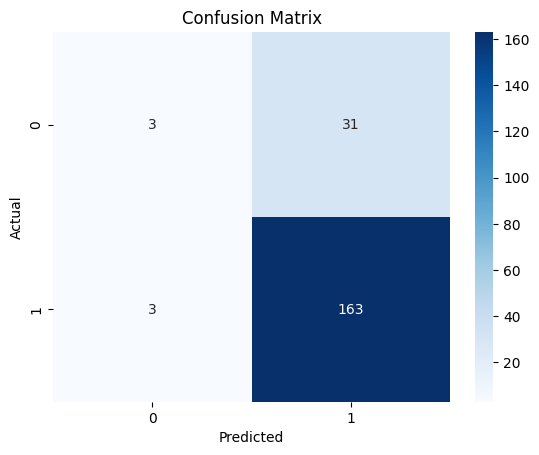

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

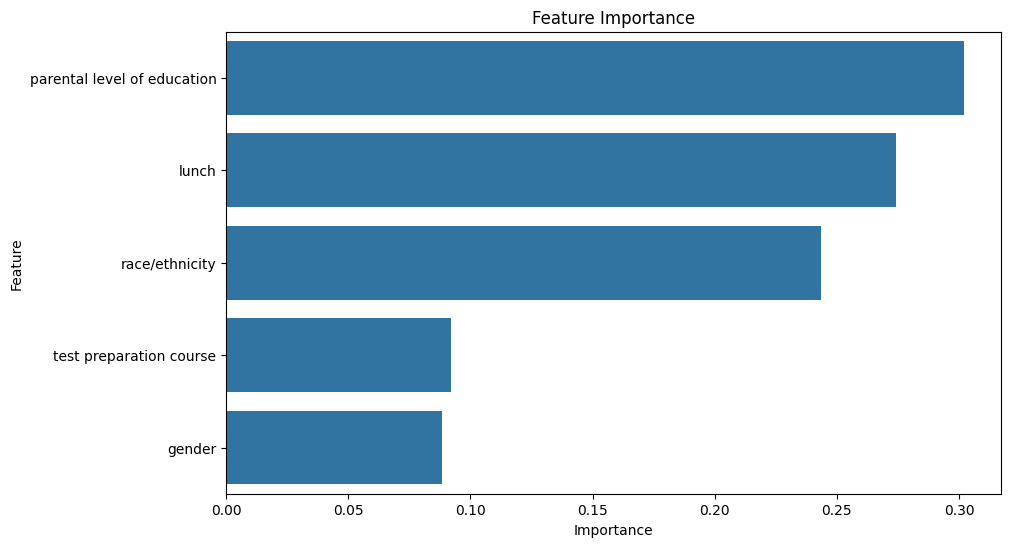

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

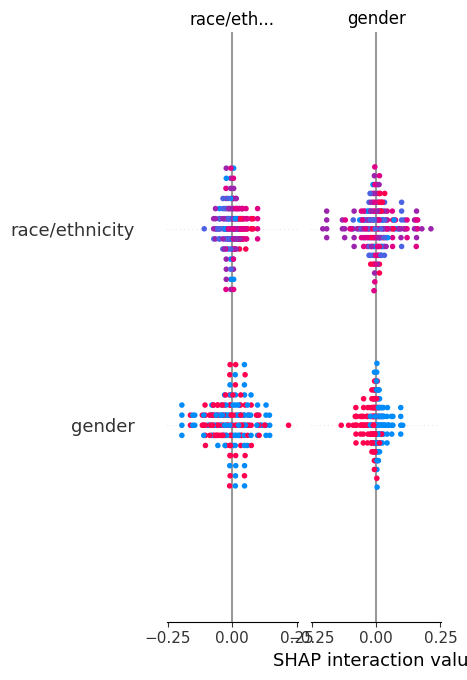

In [44]:
# SHAP analysis
exp = shap.TreeExplainer(best_model)
shap_values = exp.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

prediction/ testing

In [45]:
new_student = pd.DataFrame({
    'gender': ['female'],
    'race/ethnicity': ['group C'],
    'parental level of education': ["bachelor's degree"],
    'lunch': ['standard'],
    'test preparation course': ['completed']
})

In [46]:
# Preprocess new data
for col in categorical_cols:
    new_student[col] = label_encoders[col].transform(new_student[col])


In [47]:
# Predict
prediction = best_model.predict(new_student)
print("\nPredicted Math Pass (1=Pass, 0=Fail):", prediction[0])


Predicted Math Pass (1=Pass, 0=Fail): 1
